In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
import seaborn as sns
labels = pd.read_csv("train_labels.csv",encoding = 'latin-1')
values = pd.read_csv("train_values.csv",encoding = 'latin-1')
pd.options.display.max_colwidth = 250
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [7]:
df = labels.merge(values,left_on='building_id',right_on='building_id')
df

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id','damage_grade']).agg({'building_id' : 'count'}).nlargest(25,'building_id')

building_id
geo_level_1_id geo_level_2_id geo_level_3_id damage_grade             
26             39             9133           1                     450
                              633            1                     372
20             158            621            2                     343
26             39             633            2                     273
10             151            7723           1                     269
20             158            9229           2                     250
26             39             11440          1                     238
                              11246          1                     234
                              2005           2                     230
7              1166           406            2                     223
20             158            2452           2                     216
26             39             11246          2                     210
                              2005           1                     200
                              11440          2                     191
10             735            10221          2                     182
26             39             9133           2                     182
                              1851           2                     181
                              10445          2                     180
               991            2170           2                     180
9              445            10728          2                     172
7              157            9272           2                     166
26             1001           12258          1                     166
                              6626           1                     165
6              376            10236          2                     160
8              463            8236           3                     158

In [15]:
df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id']).agg({'building_id' : 'count'}).nlargest(5,'building_id')

building_id
geo_level_1_id geo_level_2_id geo_level_3_id             
26             39             633                     651
                              9133                    647
20             158            621                     530
26             39             11246                   470
                              2005                    466

In [23]:
df['age_quantile'] = pd.qcut(df['age'], q=6)
df

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age_quantile
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,"(25.0, 35.0]"
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,"(5.0, 10.0]"
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,"(5.0, 10.0]"
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,"(5.0, 10.0]"
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,"(25.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,"(35.0, 995.0]"
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,"(-0.001, 5.0]"
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,"(35.0, 995.0]"
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,"(5.0, 10.0]"


In [30]:
#observando este resultado vemos que hay grandes cantidades de edificios afectados por grados altos de danio, en todas las edades de edificio. 
# Es decir que no parece haber correlacion entre ambos valores
df.groupby(['age_quantile','damage_grade']).agg({'building_id' : 'count'}).sort_values(by='damage_grade')

,,building_id
age_quantile,damage_grade,
"(-0.001, 5.0]",1,12803
"(35.0, 995.0]",1,1006
"(5.0, 10.0]",1,4360
"(10.0, 15.0]",1,2878
"(15.0, 25.0]",1,3085
"(25.0, 35.0]",1,992
"(-0.001, 5.0]",2,31751
"(5.0, 10.0]",2,22370
"(10.0, 15.0]",2,20767


In [35]:
#efectivamente al checkear la correlacion, no hay correlacion
df['age'].corr(df['damage_grade'])

0.02927330217043438

In [37]:
#tampoco con cantidad de pisos
df['damage_grade'].corr(df['count_floors_pre_eq'])

0.12230849360229883

In [41]:
df.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

In [63]:
df = df.rename(columns={'has_superstructure_adobe_mud' : 'ad_mud','has_superstructure_mud_mortar_stone' : 'mud_mort_st', 'has_superstructure_stone_flag':'st_flag','has_superstructure_cement_mortar_stone':'cem_mor_st','has_superstructure_mud_mortar_brick': 'mud_mor_br','has_superstructure_cement_mortar_brick':'cem_mor_br', 'has_superstructure_timber':'timber','has_superstructure_bamboo':'bamboo', 'has_superstructure_rc_non_engineered':'rc_non_eng','has_superstructure_rc_engineered':'rc_eng', 'has_superstructure_other':'other'})
df.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'ad_mud', 'mud_mort_st', 'st_flag', 'cem_mor_st',
       'mud_mor_br', 'cem_mor_br', 'timber', 'bamboo', 'rc_non_eng', 'rc_eng',
       'other', 'legal_ownership_status', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'age_quantile'],
      dtype='object')

In [67]:
edificios_por_superstructure = df.groupby(['ad_mud','mud_mort_st','st_flag','cem_mor_st','mud_mor_br','cem_mor_br','timber','bamboo','rc_non_eng','rc_eng', 'other','damage_grade']).agg({'building_id':'count'})
edificios_por_superstructure

building_id
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other damage_grade             
0      0           0       0          0          0          0      0      0          0      1     1                     180
                                                                                                  2                     111
                                                                                                  3                      51
                                                                                     1      0     1                    1774
                                                                                                  2                     773
...                                                                                                                     ...
1      1           1       1          1          0          1      1      0          0      1     3                       1
                                                 1          0      0      0          0      0     1                       1
                                                                          1          0      0     2                       5
                                                            1      0      0          0      0     2                       3
                                                                          1          0      0     2                       1

[942 rows x 1 columns]

In [68]:
edificios_por_superstructure.unstack().sort_values(by=('building_id',1),ascending=False) #.to_csv('edificios_por_superstructure.csv')

building_id  \
damage_grade                                                                                                1   
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other               
0      1           0       0          0          0          0      0      0          0      0          4946.0   
       0           0       0          0          1          0      0      0          0      0          4169.0   
                                                 0          0      0      1          0      0          2307.0   
                                                            1      0      0          0      0          2236.0   
       1           0       0          0          0          1      0      0          0      0          1951.0   
...                                                                                                       ...   
1      1           1       1          1          0          1      0      1          0      0             NaN   
                                                                   1      0          0      1             NaN   
                                                 1          0      0      1          0      0             NaN   
                                                            1      0      0          0      0             NaN   
                                                                          1          0      0             NaN   

                                                                                                            \
damage_grade                                                                                             2   
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other            
0      1           0       0          0          0          0      0      0          0      0      75831.0   
       0           0       0          0          1          0      0      0          0      0       5514.0   
                                                 0          0      0      1          0      0       1756.0   
                                                            1      0      0          0      0       2461.0   
       1           0       0          0          0          1      0      0          0      0      17519.0   
...                                                                                                    ...   
1      1           1       1          1          0          1      0      1          0      0          1.0   
                                                                   1      0          0      1          NaN   
                                                 1          0      0      1          0      0          5.0   
                                                            1      0      0          0      0          3.0   
                                                                          1          0      0          1.0   

                                                                                                            
damage_grade                                                                                             3  
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other           
0      1           0       0          0          0          0      0      0          0      0      56357.0  
       0           0       0          0          1          0      0      0          0      0        423.0  
                                                 0          0      0      1          0      0        104.0  
                                                            1      0      0          0      0        448.0  
       1           0       0          0          0          1      0      0          0      0       9391.0  
...                                                                                                   

In [70]:
df.groupby(['ad_mud','mud_mort_st','st_flag','cem_mor_st','mud_mor_br','cem_mor_br','timber','bamboo','rc_non_eng','rc_eng', 'other','age']).agg({'building_id':'count'}).unstack()

building_id  \
age                                                                                                       0     
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other               
0      0           0       0          0          0          0      0      0          0      1           155.0   
                                                                                     1      0           862.0   
                                                                                            1             NaN   
                                                                          1          0      0          1374.0   
                                                                                            1             1.0   
...                                                                                                       ...   
1      1           1       1          1          0          1      1      0          0      1             NaN   
                                                 1          0      0      0          0      0             NaN   
                                                                          1          0      0             NaN   
                                                            1      0      0          0      0             NaN   
                                                                          1          0      0             NaN   

                                                                                                           \
age                                                                                                   5     
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other           
0      0           0       0          0          0          0      0      0          0      1        66.0   
                                                                                     1      0       793.0   
                                                                                            1         1.0   
                                                                          1          0      0      1182.0   
                                                                                            1         NaN   
...                                                                                                   ...   
1      1           1       1          1          0          1      1      0          0      1         NaN   
                                                 1          0      0      0          0      0         NaN   
                                                                          1          0      0         NaN   
                                                            1      0      0          0      0         1.0   
                                                                          1          0      0         NaN   

                                                                                                          \
age                                                                                                  10    
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other          
0      0           0       0          0          0          0      0      0          0      1       32.0   
                                                                                     1      0      477.0   
                                                                                            1        1.0   
                                                                          1          0      0      734.0   
                                                                                            1        NaN   
...                                                                                                  ...   
1      1        

In [78]:
df.groupby(['ad_mud','mud_mort_st','st_flag','cem_mor_st','mud_mor_br','cem_mor_br','timber','bamboo','rc_non_eng','rc_eng', 'other','count_families']).agg({'building_id':'count'}).sort_values(by='building_id',ascending=False) #.unstack()

building_id
ad_mud mud_mort_st st_flag cem_mor_st mud_mor_br cem_mor_br timber bamboo rc_non_eng rc_eng other count_families             
0      1           0       0          0          0          0      0      0          0      0     1                    119590
                                                            1      0      0          0      0     1                     25548
                                                            0      0      0          0      0     0                     10479
                                                            1      1      0          0      0     1                      9054
       0           0       0          0          1          0      0      0          0      0     1                      8311
...                                                                                                                       ...
1      0           0       0          0          0          0      0      0          0      0     7                         1
                                                                                                  6                         1
0      0           0       1          0          1          1      0      1          0      1     1                         1
                                                                                     1      0     0                         1
1      1           1       1          1          1          1      0      1          0      0     1                         1

[1039 rows x 1 columns]

In [81]:
df.groupby(['damage_grade','count_families']).agg({'building_id':'count'}).sort_values(by=['count_families','damage_grade'],ascending=False) #.unstack()

,,building_id
damage_grade,count_families,
2,9,3
1,9,1
2,8,1
1,8,1
3,7,2
2,7,2
1,7,3
3,6,10
2,6,8


In [93]:
df.groupby(['plan_configuration','damage_grade']).agg({'building_id':'count'}).sort_values(by=['building_id','damage_grade'],ascending=False) #.unstack()

building_id
plan_configuration damage_grade             
d                  2                  142523
                   3                   84239
                   1                   23310
q                  2                    2585
u                  2                    2399
q                  3                    2326
                   1                     781
u                  1                     774
                   3                     476
s                  2                     223
c                  2                     206
a                  2                     157
o                  2                      96
c                  1                      86
s                  3                      70
a                  1                      66
s                  1                      53
o                  1                      40
m                  2                      34
c                  3                      33
a                  3                      29
o                  3                      23
n                  2                      20
f                  2                      16
n                  3                      12
m                  1                       8
f                  3                       6
n                  1                       6
m                  3                       4

In [115]:
import numpy as np

#df['']np.log(df['norm'])

configs_by_geo_level = df.groupby(['plan_configuration','geo_level_1_id']).agg({'building_id':'count'}).sort_values(by=['building_id'],ascending=False).fillna(0) #.unstack().fillna(0) 
configs_by_geo_level['building_id'] = np.log(configs_by_geo_level['building_id'])
configs_by_geo_level = configs_by_geo_level.unstack().fillna(0)
configs_by_geo_level

building_id                                          \
geo_level_1_id              0         1         2         3         4    
plan_configuration                                                       
a                     2.833213  3.044522  1.791759  2.079442  0.000000   
c                     1.386294  0.000000  0.000000  2.079442  1.098612   
d                     8.273081  7.870930  6.814543  8.877800  9.566475   
f                     0.000000  0.000000  0.000000  0.000000  0.000000   
m                     1.609438  0.000000  0.000000  1.945910  0.000000   
n                     0.000000  0.000000  0.000000  0.000000  1.386294   
o                     1.386294  0.000000  0.000000  1.609438  0.000000   
q                     3.218876  3.465736  2.079442  5.010635  5.056246   
s                     1.098612  0.693147  0.000000  2.302585  2.944439   
u                     3.583519  3.258097  1.609438  5.187386  4.634729   

                                                                       ...  \
geo_level_1_id            5          6         7         8         9   ...   
plan_configuration                                                     ...   
a                   1.386294   2.484907  2.079442  2.397895  1.609438  ...   
c                   1.945910   3.583519  3.871201  2.564949  2.197225  ...   
d                   7.869019  10.069468  9.807692  9.806371  8.238537  ...   
f                   0.000000   0.693147  0.000000  1.386294  0.000000  ...   
m                   0.000000   0.000000  0.693147  0.000000  0.000000  ...   
n                   0.000000   0.000000  1.386294  1.386294  0.000000  ...   
o                   0.000000   2.197225  2.708050  1.386294  0.000000  ...   
q                   3.367296   5.937536  6.263398  6.616065  4.727388  ...   
s                   1.098612   2.833213  3.218876  2.564949  0.693147  ...   
u                   3.433987   5.749393  5.262690  4.897840  3.784190  ...   

                                                                      \
geo_level_1_id            21        22        23        24        25   
plan_configuration                                                     
a                   1.386294  1.791759  0.000000  0.000000  2.772589   
c                   2.833213  2.197225  0.693147  0.000000  2.302585   
d                   9.579695  8.707814  7.009409  7.166266  8.579041   
f                   0.693147  0.000000  0.000000  0.000000  0.693147   
m                   0.000000  0.000000  0.000000  0.000000  0.000000   
n                   0.000000  0.000000  0.000000  0.000000  0.693147   
o                   1.791759  0.000000  0.000000  0.000000  1.386294   
q                   5.429346  4.997212  1.609438  1.791759  5.278115   
s                   1.609438  2.079442  0.000000  0.000000  1.791759   
u                   5.062595  3.433987  1.609438  1.945910  4.234107   

                                                                      
geo_level_1_id            26        27        28        29        30  
plan_configuration                                                    
a                   1.791759  2.484907  0.693147  0.000000  2.564949  
c                   3.637586  3.526361  0.000000  0.000000  1.791759  
d                   9.981420  9.367686  5.472271  5.966147  7.855157  
f                   0.693147  0.693147  0.000000  0.000000  0.000000  
m                   2.484907  2.079442  0.000000  0.000000  0.000000  
n                   1.098612  0.693147  0.000000  0.000000  0.000000  
o                   3.091042  2.302585  0.000000  0.000000  0.000000  
q                   6.169611  5.929589  3.218876  1.609438  2.564949  
s                   3.401197  3.258097  0.000000  0.000000  0.693147  
u                   5.998937  5.880533  0.000000  0.000000  4.276666  

[10 rows x 31 columns]

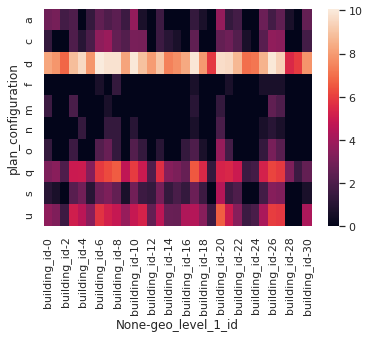

In [116]:
import numpy as np 
np.random.seed(0)
import seaborn as sns
sns.set_theme()

ax = sns.heatmap(configs_by_geo_level)